In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [385]:
# raw_data = pd.read_excel("Sayollo_HW_Data.xlsx")
raw_data = raw_data.rename(columns = {"Daily Active Users": "DAU"})
raw_data['weekday'] = raw_data['Date'].dt.day_name()

In [391]:
raw_data['Platform'].value_counts()

162581

In [8]:
games_arr = raw_data['Game'].unique()
publisher_arr = raw_data['Publisher'].unique()
platform_arr = raw_data['Platform'].unique()
countries_arr = raw_data['Country'].unique()

In [327]:
ios_data = raw_data[raw_data['Platform'] == 'IOS']
android_data = raw_data[raw_data['Platform'] == 'Android']

Sum of DAU in March and April of Each Country - Both Platforms

In [ ]:
country_DAU_sum = raw_data.groupby('Country')['DAU'].sum().sort_values(ascending = False)
country_DAU_sum = country_DAU_sum[1:]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(country_DAU_sum.index, country_DAU_sum.values);
ax.set_xticklabels(country_DAU_sum.index, rotation = 90);
ax.set_ylabel("Sum of DAU")
ax.set_xlabel("Countries")
ax.set_title("Countries with highest sum of DAU")
# plt.show()
# plt.savefig("Countries_sum_DAU.png", dpi = 200)

Sum of DAU in March and April of Each Country - IOS/Android platform

(0.0, 769043084.97)

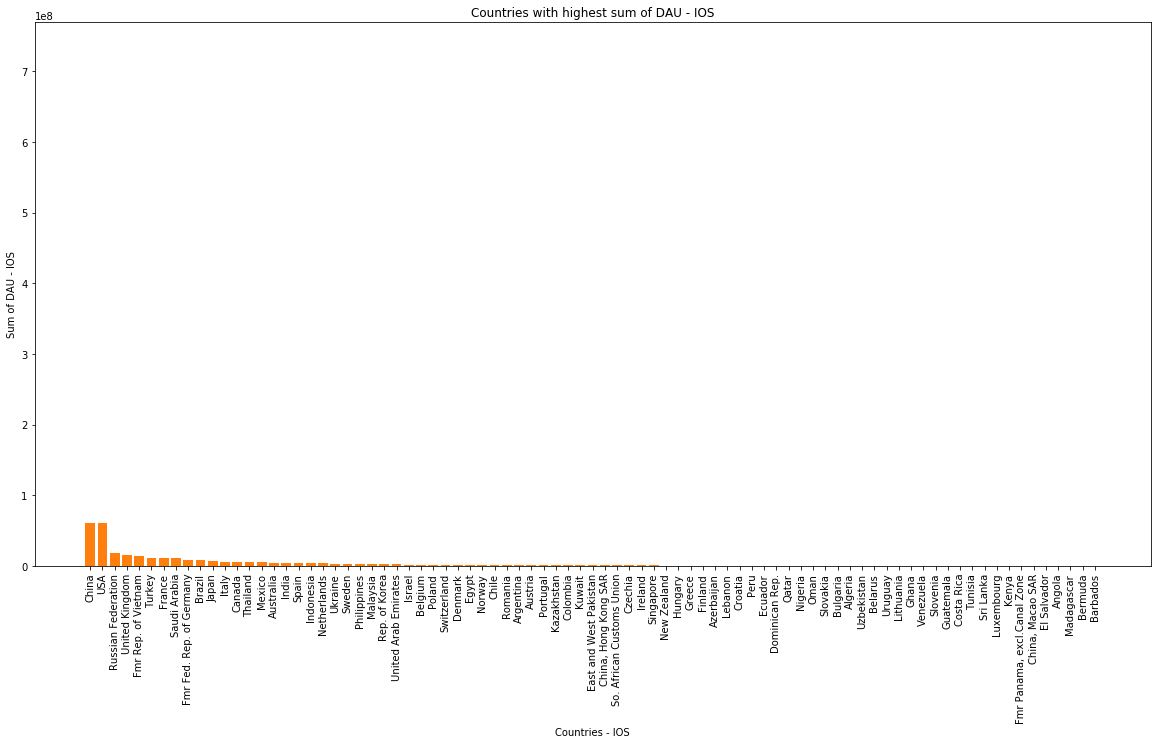

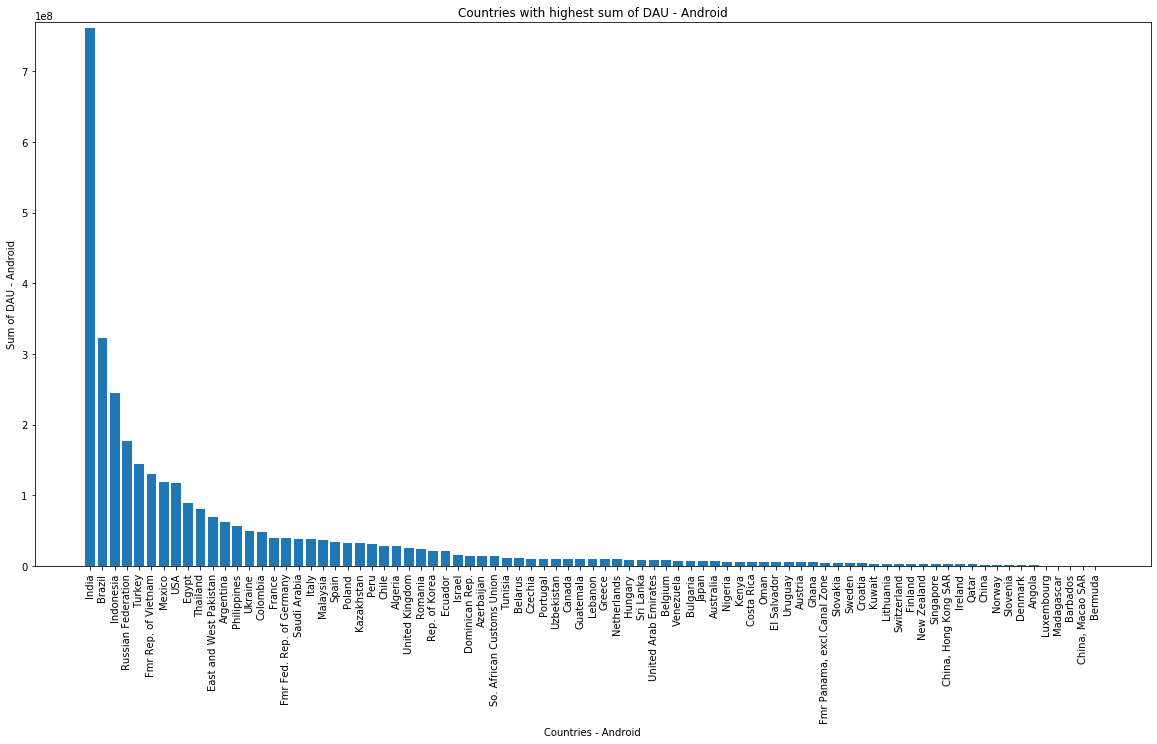

In [399]:
country_DAU_sum_ios = ios_data.groupby('Country')['DAU'].sum().sort_values(ascending = False)
country_DAU_sum_ios = country_DAU_sum_ios[1:]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(country_DAU_sum_ios.index, country_DAU_sum_ios.values, color = "C1");
ax.set_xticklabels(country_DAU_sum_ios.index, rotation = 90);
ax.set_ylabel("Sum of DAU - IOS")
ax.set_xlabel("Countries - IOS")
ax.set_title("Countries with highest sum of DAU - IOS")
ax.set_ylim(top = country_DAU_sum_android.values.max()*1.01)
# plt.show()
# plt.savefig("Countries_sum_DAU.png", dpi = 200)

country_DAU_sum_android = android_data.groupby('Country')['DAU'].sum().sort_values(ascending = False)
country_DAU_sum_android = country_DAU_sum_android[1:]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(country_DAU_sum_android.index, country_DAU_sum_android.values);
ax.set_xticklabels(country_DAU_sum_android.index, rotation = 90);
ax.set_ylabel("Sum of DAU - Android")
ax.set_xlabel("Countries - Android")
ax.set_title("Countries with highest sum of DAU - Android")
ax.set_ylim(top = country_DAU_sum_android.values.max()*1.01)
# plt.show()
# plt.savefig("Countries_sum_DAU.png", dpi = 200)

Sum of DAU in March and April of Each Country - IOS/Android combined

In [ ]:
DAU_ios_df = pd.DataFrame(country_DAU_sum_ios)
DAU_andr_df = pd.DataFrame(country_DAU_sum_android)
DAU_df = pd.merge(DAU_andr_df, DAU_ios_df, left_index=True, right_index=True)
DAU_df = DAU_df.rename(columns = {'DAU_x': "DAU_andr", 'DAU_y':'DAU_ios'})
DAU_df['DAU_total'] = DAU_df['DAU_andr'] + DAU_df['DAU_ios']
DAU_df = DAU_df.sort_values(by = 'DAU_total', ascending = False)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(DAU_df.index, DAU_df["DAU_andr"], label = "Android")
ax.bar(DAU_df.index, DAU_df["DAU_ios"], bottom=DAU_df["DAU_andr"], label = "IOS")
ax.set_xticklabels(DAU_df.index, rotation=90) 
ax.set_ylabel("DAU")
ax.legend()
plt.show()

Mean DAU per Game - IOS/Android Platforms

In [ ]:
country_DAU_mean_ios = ios_data.groupby('Country')['DAU'].mean().sort_values(ascending = False)
country_DAU_mean_ios = country_DAU_mean_ios[1:]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(country_DAU_mean_ios.index, country_DAU_mean_ios.values, color = "C1");
ax.set_xticklabels(country_DAU_mean_ios.index, rotation = 90);
ax.set_ylabel("Mean of DAU - IOS")
ax.set_xlabel("Countries - IOS")
ax.set_title("Countries with highest mean of DAU - IOS")
ax.set_ylim(top = country_DAU_mean_ios.values.max()*1.01)
# plt.show()
# plt.savefig("Countries_sum_DAU.png", dpi = 200)

country_DAU_mean_android = android_data.groupby('Country')['DAU'].mean().sort_values(ascending = False)
country_DAU_mean_android = country_DAU_mean_android[1:]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(country_DAU_mean_android.index, country_DAU_mean_android.values);
ax.set_xticklabels(country_DAU_mean_android.index, rotation = 90);
ax.set_ylabel("Mean of DAU - Android")
ax.set_xlabel("Countries - Android")
ax.set_title("Countries with highest mean of DAU - Android")
ax.set_ylim(top = country_DAU_mean_android.values.max()*1.01)
# plt.show()
# plt.savefig("Countries_sum_DAU.png", dpi = 200)

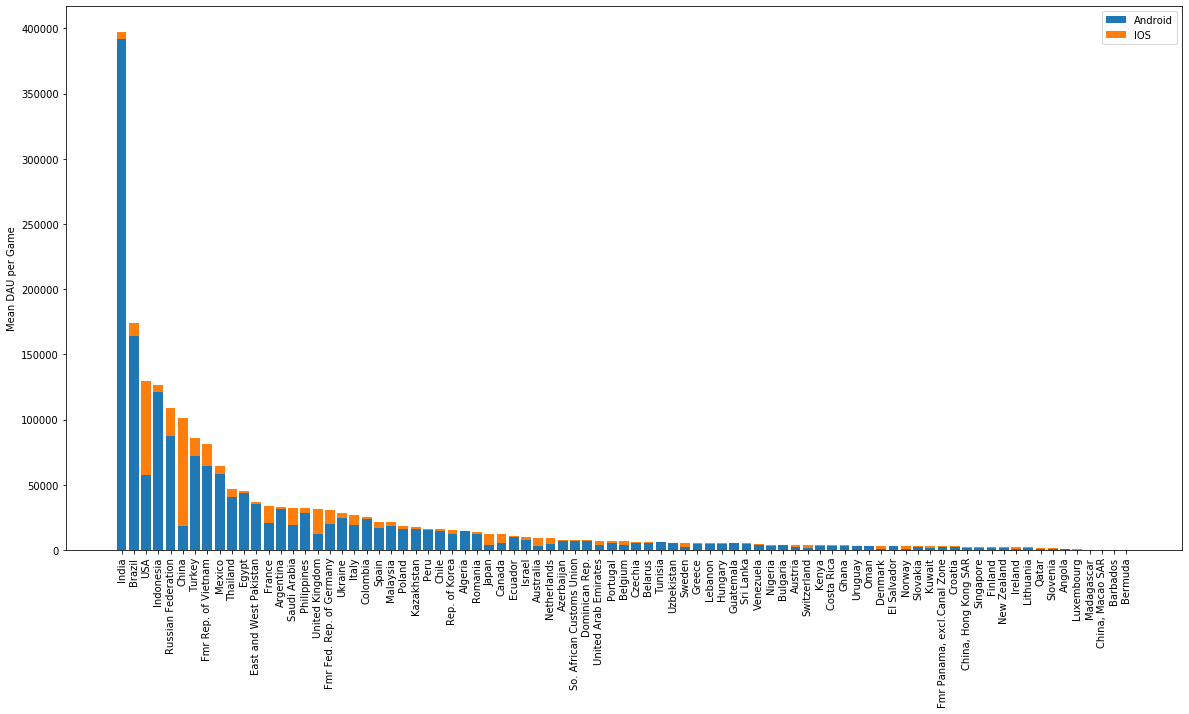

In [373]:
mean_DAU_ios_df = pd.DataFrame(country_DAU_mean_ios)
mean_DAU_andr_df = pd.DataFrame(country_DAU_mean_android)
mean_DAU_df = pd.merge(mean_DAU_andr_df, mean_DAU_ios_df, left_index=True, right_index=True)
mean_DAU_df = mean_DAU_df.rename(columns = {'DAU_x': "DAU_andr", 'DAU_y':'DAU_ios'})
mean_DAU_df['DAU_total'] = mean_DAU_df['DAU_andr'] + mean_DAU_df['DAU_ios']
mean_DAU_df = mean_DAU_df.sort_values(by = 'DAU_total', ascending = False)
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(mean_DAU_df.index, mean_DAU_df["DAU_andr"], label = "Android")
ax.bar(mean_DAU_df.index, mean_DAU_df["DAU_ios"], bottom=mean_DAU_df["DAU_andr"], label = "IOS")
ax.set_xticklabels(mean_DAU_df.index, rotation=90) 
ax.set_ylabel("Mean DAU per Game")
ax.legend()
plt.show()

Each country's average DAU per Game?

Text(0.5, 1.0, 'Countries with highest mean DAU')

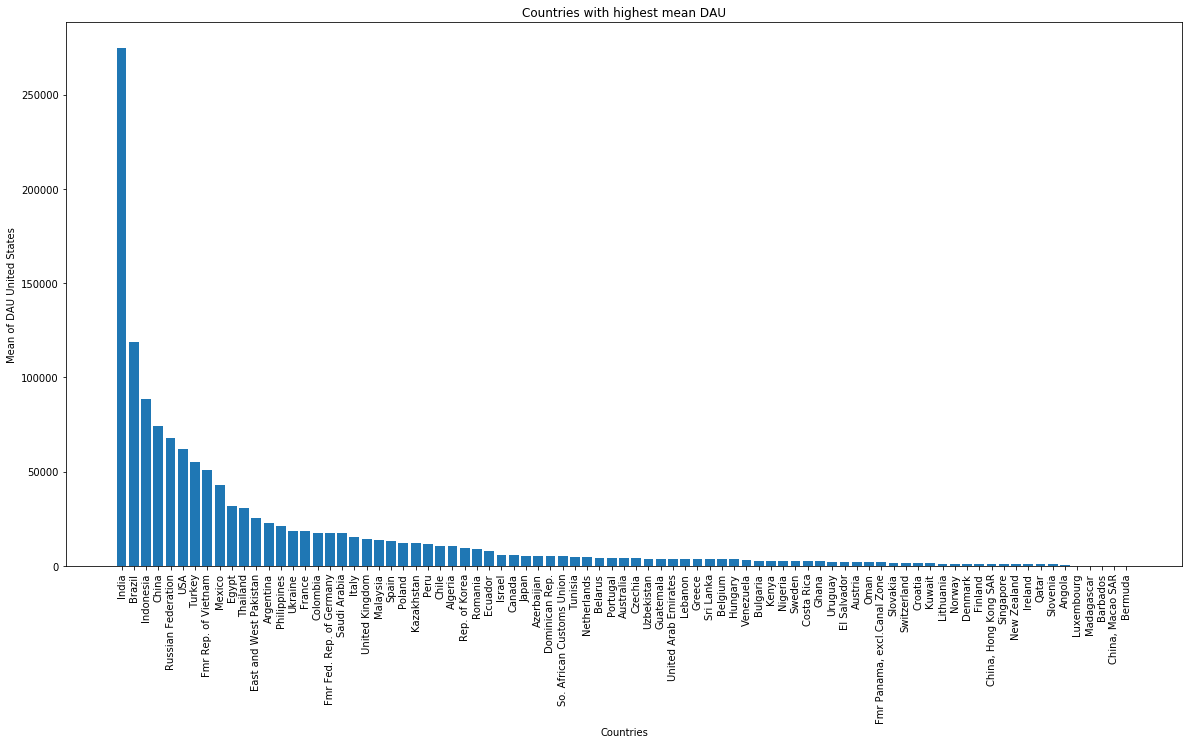

In [374]:
country_DAU_mean = raw_data.groupby('Country')['DAU'].mean().sort_values(ascending = False)
country_DAU_mean = country_DAU_mean[1:]
fig, ax = plt.subplots()
fig.set_size_inches(20, 10)
ax.bar(country_DAU_mean.index, country_DAU_mean.values);
ax.set_xticklabels(country_DAU_mean.index, rotation = 90);
ax.set_xlabel("Countries")
ax.set_ylabel("Mean of DAU United States")
ax.set_title("Countries with highest mean DAU")
# plt.show()
# plt.savefig("Countries_highest_DAU.png", dpi = 200)

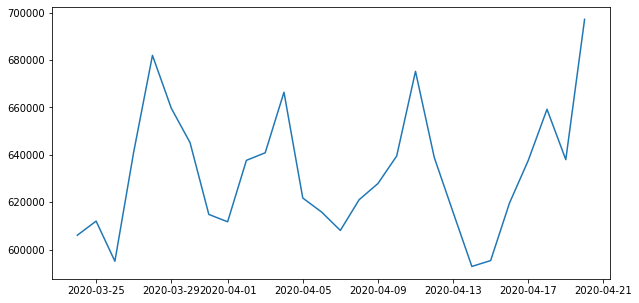

In [269]:
worldwide = raw_data[raw_data['Country'] == 'Worldwide']
worldwide_mean_DAU = worldwide.groupby('Date')['DAU'].mean()
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
ax.plot(worldwide_mean_DAU.index, worldwide_mean_DAU.values)

In [ ]:
worldwide_game_entry_count = worldwide.groupby('Game')['Game'].count().sort_values(ascending=True)

fig, ax = plt.subplots()
fig.set_size_inches(5, 12)
ax.barh(worldwide_game_entry_count.index, worldwide_game_entry_count.values)

How many games are active in each country?

In [368]:
# country_game = raw_data.groupby('Country')['Game'].unique()
# country_game_df = pd.DataFrame(index = range(len(country_game)), columns = ['Country','Num_of_Games'])
# for index, c in enumerate(country_game.index):
#     country_game_df.iloc[index,] = [c,len(country_game[index])]

# country_game_df = country_game_df.sort_values('Num_of_Games', ascending = False)
# country_game_df.reset_index(inplace = True)

# fig, ax = plt.subplots()
# fig.set_size_inches(10, 20)
# ax.barh(country_game_df['Country'], country_game_df['Num_of_Games'])
# ax.set_ylabel("Countries")
# ax.set_xlabel("Number of Games")
# # # plt.show()
country_game_df[country_game_df['Country'].isin(DAU_df.index[0:15])]

,index,Country,Num_of_Games
5,25,Egypt,67
7,63,Russian Federation,67
10,76,USA,67
12,77,Ukraine,66
17,50,Mexico,66
23,30,Fmr Rep. of Vietnam,66
26,2,Argentina,66
42,57,Philippines,65
45,37,Indonesia,65
46,73,Thailand,65


How many game studios are active in each country?

In [ ]:
country_studio = raw_data.groupby('Country')['Publisher'].unique()
country_studio_df = pd.DataFrame(index = range(len(country_studio)), columns = ['Country','Num_of_Studios'])
for index, c in enumerate(country_studio.index):
    country_studio_df.iloc[index,] = [c,len(country_studio[index])]

country_studio_df = country_studio_df.sort_values('Num_of_Studios', ascending = False)
country_studio_df.reset_index(inplace = True)

fig, ax = plt.subplots()
fig.set_size_inches(5, 15)
ax.barh(country_studio_df['Country'], country_studio_df['Num_of_Studios'])
ax.set_ylabel("Countries")
ax.set_xlabel("Number of Studios")
# plt.show()
# country_studio_df[country_studio_df['Country'].isin(['India', 'Brazil', 'Indonesia', 'China', 
#                                                  'Russian Federation', 'USA', 'Turkey', 
#                                                  'Fmr Rep. of Vietnam', 'Mexico', 'Egypt'])]

Analysis of DAU Trend by Country

In [187]:
def daily_DAU_by_c(c):
    """
    Args:
        string, Country name
    Returns:
        a dataframe that summarizes the country's DAU over sample period
    """
    df = country_data[c]
    df = df.groupby('Date')['DAU'].sum()
    return df

def DAU_date_plot(c):
    """
    Plots the country's DAU trend 
    """
    df = daily_DAU_by_c(c)
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 1)
    ax.plot(df.index, df.values)
    ax.set_xlabel(c)
    ax.set_ylabel("Daily DAU")
    plt.show()

In [ ]:
## DAU trend on countries
# country_data = {}
# for c in country_game.index:
#     df = raw_data[raw_data['Country'] == c]
#     country_data.update({c: df})

# for c in country_game.index:
#     DAU_date_plot(c)
top_countries = ['Brazil', 'Indonesia', 'China', 'Russian Federation', 'USA', 'Turkey', 'Mexico', 'Egypt']
top_countries_df = raw_data[raw_data['Country'].isin(top_countries)]
top_countries_df_pivot = top_countries_df.pivot_table(values = 'DAU', columns = 'Country',index = 'Date')
top_countries_df_pivot.reset_index(inplace = True)
top_countries_df_pivot.plot('Date', top_countries, figsize= (8,7))

Logistic regression to see how much surge does weekend impose?

In [384]:
country_data = {}
for c in top_countries:
    country_raw = raw_data[raw_data['Country'] == c]
    df = country_raw.groupby('Date')['DAU'].sum()
    df = pd.DataFrame(df)
    df['dayofweek'] = df.index.day_name()
    df['weekday'] = np.where(df['dayofweek'].isin(['Saturday', 'Sunday']), True, False)
    country_data.update({c: df})

## for Egypt
country_raw = raw_data[raw_data['Country'] == 'Egypt']
df = country_raw.groupby('Date')['DAU'].sum()
df = pd.DataFrame(df)
df['dayofweek'] = df.index.day_name()
df['weekday'] = np.where(df['dayofweek'].isin(['Saturday', 'Friday']), True, False)
country_data.update({'Egypt': df})    

## for China
country_raw = raw_data[raw_data['Country'] == 'China']
df = country_raw.groupby('Date')['DAU'].sum()
df = pd.DataFrame(df)
df['dayofweek'] = df.index.day_name()
df['weekday'] = np.where(df['dayofweek'].isin(['Saturday', 'Sunday']), True, False)
country_data.update({'China': df})    

weekend_surge = pd.DataFrame(index = top_countries, columns = ['weekend surge'])  
for c in top_countries:
    df = country_data[c]
    weekend_DAU = df[df['weekday'] == True]['DAU'].mean()
    workday_DAU = df[df['weekday'] == False]['DAU'].mean()
    surge = weekend_DAU/workday_DAU - 1
    weekend_surge.loc[c, 'weekend surge'] = round(surge,4)
weekend_surge

,weekend surge
Brazil,0.088384
Indonesia,0.084789
China,0.154965
Russian Federation,0.105275
USA,0.118506
Turkey,0.086693
Mexico,0.09602
Egypt,0.088777


In [397]:
country_data = {}
for c in mean_DAU_df.index[0:15]:
    country_raw = raw_data[raw_data['Country'] == c]
    country_data.update({c: country_raw})

andr_portion = pd.DataFrame(index = mean_DAU_df.index[0:15], columns = ['andr_portion'])  
for c in mean_DAU_df.index[0:15]:
    df = country_data[c]
    andr = df['Platform'].value_counts().Android
    ios = df['Platform'].value_counts().IOS
    andr_portion_value = andr/(andr+ios)
    andr_portion.loc[c, 'andr_portion'] = round(andr_portion_value,4)
andr_portion

,andr_portion
Country,
India,0.6963
Brazil,0.7066
USA,0.7052
Indonesia,0.718
Russian Federation,0.7075
China,0.1319
Turkey,0.7095
Fmr Rep. of Vietnam,0.7156
Mexico,0.7052


In [241]:
## DAU trend on Games

# top games with highest DAU
game_DAU_mean = raw_data.groupby('Game')['DAU'].mean().sort_values(ascending = False)

top_game = game_DAU_mean.index[:10]
top_games_df = raw_data[raw_data['Game'].isin(top_game)]
top_games_df_pivot = top_games_df.pivot_table(values = 'DAU', columns = 'Game',index = 'Date')
top_games_df_pivot.reset_index(inplace = True)
# top_games_df_pivot.plot('Date', top_game, figsize= (8,7))

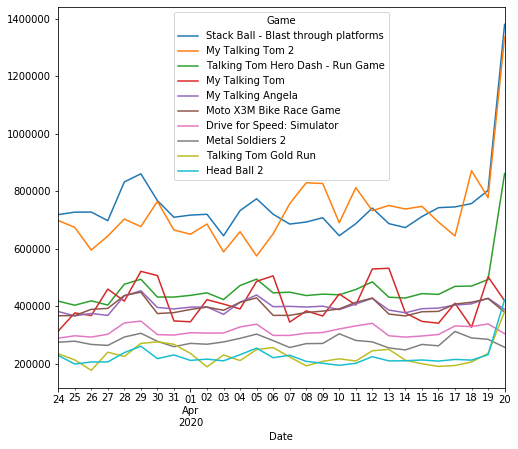

In [261]:
## DAU trend on countries

# top_countries = ['Brazil', 'Indonesia', 'China', 'Russian Federation', 'USA', 'Turkey', 'Mexico', 'Egypt']
india_df = raw_data[raw_data['Country'] == 'Brazil']
top_india_games = india_df.groupby('Game')['DAU'].mean().sort_values(ascending = False).index[:10]
india_pivot = india_df.pivot_table(values = 'DAU', columns = 'Game',index = 'Date')
india_pivot.reset_index(inplace = True)
india_pivot.plot('Date', top_india_games, figsize= (8,7))

In [280]:
raw_data[raw_data['Game'] == 'Mini Golf Clash']

,Game,Publisher,Date,DAU,Daily Cellphone Users,Daily Tablet Users,Platform,Country,weekday
